# Быстры запуск программы для детекции символов на автомобильных знаках

In [1]:
from ultralytics import YOLO
from glob import glob
import os
import matplotlib.pyplot as plt
from PIL import Image

In [10]:
# Функция для предсказания
def predict(source: str, model, save: bool = True):
    # Предсказание моделью
    results = model(source)
    # Словарь с метками классов    
    names = results[0].names
    
    for r in results:
        # Все предсказанные классы
        labels = r.boxes.cls.tolist()

        # Создаем словарь, чтобы отсортировать предсказания по порядку
        # слева-направо
        ordered_dict = {}

        # Нанесение на изображение предсказанных меток
        img_array = r.plot(conf=False, line_width=3)
        img = Image.fromarray(img_array[..., ::-1])
        
        # Добавляем название класса в labels
        for i in range(len(labels)):
            x_cord = r.boxes[i].xywh[0].tolist()[0]
            ordered_dict[x_cord] = names.get(labels[i])
            
        ordered_dict = {k:v for k,v in sorted(ordered_dict.items())}

        title = ''.join(ordered_dict.values())
        title = title[:4] + ' ' + title[4:]

        # Вывод изображения на экран
        plt.axis('Off')
        plt.title(f"Номер: {title}")
        plt.imshow(img)

        # Сохранение изображения
        if save == True:
            filename = source.split('/')[-1]
            plt.savefig(f'results/{filename}')

In [3]:
# Загрузка модели
print("Привет, загружаю веса модели yolo v8 ...")
try:
    model = YOLO(os.path.join(os.getcwd(), 'weights', 'best.pt'))
except:
    raise NameError("Не могу загрузить веса модели. Проверьте правильность пути до файла ...")

Привет, загружаю веса модели yolo v8 ...


In [7]:
def main():
    print("Файлы с изображениями должны храниться в папке 'Data/my_examples'")
    source_img = input("Введите название изображения (1.jpg): ")

    source = 'Data/my_examples/' + source_img

    # Сохранять ли результат в results/
    save = input("Сохранять результат детекции изображения (да: +, нет: -): ")
    if save == '' or save.lower() == 'да' or save.lower() == '+':
        # Детекция изображения
        predict(source, model)
        print(f"Результат сохранен в results/{source_img}")
    else:
        predict(source, model, save=False)

# Запуск программы
Если необходимо запустить программу еще раз, просто повторно запустить ячейку с main()

Файлы с изображениями должны храниться в папке 'Data/my_examples'

image 1/1 d:\Тестовые задания от it-компаний\ML CV Rutcod\Test-CV-Rutcod\Data\my_examples\5.jpeg: 352x640 2 2s, 1 3, 1 5, 1 B, 1 D, 1 L, 68.0ms
Speed: 7.0ms preprocess, 68.0ms inference, 1.0ms postprocess per image at shape (1, 3, 352, 640)
Результат сохранен в results/5.jpeg


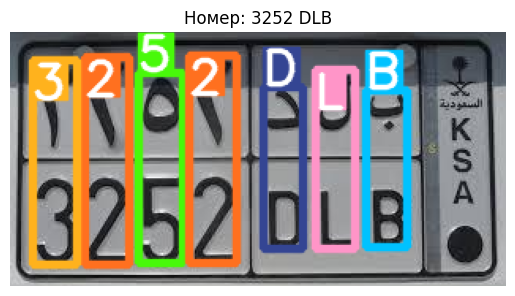

In [15]:
main()